# Data download

In [ ]:
!gdown https://drive.google.com/uc?id=1mURorhNzQCcbesiYc7afUP26JFXoRkSY

Downloading...
From: https://drive.google.com/uc?id=1mURorhNzQCcbesiYc7afUP26JFXoRkSY
To: /content/train_v2.csv
511MB [00:03, 143MB/s]


# importing data

In [85]:

# Import pandas
import pandas as pd
 
# reading csv file
data_Frame=pd.read_csv("C:/Users/Raghava/\OneDrive/Desktop/train_v2.csv")

C:\Users\Raghava\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
data_Frame.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0


In [3]:
data_Frame.shape

(105471, 771)

# working on imputataion

In [86]:
data_Frame_wout_dep=data_Frame
dependent_Var=pd.DataFrame()

In [87]:
count=0
for column in data_Frame:
  if data_Frame_wout_dep[column].isnull().sum() > 0 :
    #print(column+' '+data_Frame[column].isnull().sum())
      if (data_Frame_wout_dep[column].isnull().sum() / data_Frame_wout_dep.shape[0])*100 > 5 :
         #print("Total percentage for %s is %s" % (column, (data_Frame[column].isnull().sum() / data_Frame.shape[0])*100 ))
         del data_Frame_wout_dep[column]
         count=count+1
print(count)

43


In [88]:
data_Frame_wout_dep.shape

(105471, 728)

In [89]:
import numpy as np
data_Frame_wout_dep=data_Frame_wout_dep[~data_Frame_wout_dep.isin([np.nan, np.inf, -np.inf]).any(1)]

In [90]:
data_Frame_wout_dep.shape

(90303, 728)

In [91]:
data_Frame_wout_dep.dropna()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
0,1,126,10,0.686842,1100,3,13699,7201.0,4949.0,126.75,...,5,2.14,-1.54,1.18,0.1833,0.7873,1,0,5,0
1,2,121,10,0.782776,1100,3,84645,240.0,1625.0,123.52,...,6,0.54,-0.24,0.13,0.1926,-0.6787,1,0,5,0
2,3,126,10,0.500080,1100,3,83607,1800.0,1527.0,127.76,...,13,2.89,-1.73,1.04,0.2521,0.7258,1,0,5,0
3,4,134,10,0.439874,1100,3,82642,7542.0,1730.0,132.94,...,4,1.29,-0.89,0.66,0.2498,0.7119,1,0,5,0
4,5,109,9,0.502749,2900,4,79124,89.0,491.0,122.72,...,26,6.11,-3.82,2.51,0.2282,-0.5399,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105465,105466,140,8,0.888521,2200,4,9836,6377.0,4286.0,135.88,...,3,1.42,-1.17,0.98,0.3367,0.9228,0,0,93,0
105466,105467,126,8,0.006620,2200,4,76831,331.0,2366.0,125.25,...,3,1.07,-0.92,0.82,0.3809,-0.5489,0,0,93,0
105467,105468,137,9,0.358568,2200,4,9836,3898.0,1106.0,135.88,...,3,0.33,-0.18,0.10,0.2357,-0.8627,1,0,93,0
105468,105469,129,9,0.241858,2200,4,627,7081.0,6577.0,128.44,...,4,1.18,-0.70,0.44,0.1649,1.0901,1,0,93,0


In [92]:
correl_matrix = data_Frame_wout_dep.corr().abs()

In [93]:
import numpy as np
upper = correl_matrix.where(np.triu(np.ones(correl_matrix.shape), k=1).astype(np.bool))
drop = [column for column in upper.columns if any(upper[column] > 0.60)]
data_Frame_wout_dep.drop(drop, axis=1, inplace=True)

<ipython-input-93-c19014dc5aaf>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = correl_matrix.where(np.triu(np.ones(correl_matrix.shape), k=1).astype(np.bool))
C:\Users\Raghava\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
data_Frame_wout_dep.head()

,id,f1,f2,f3,f5,f6,f7,f8,f13,f14,...,f701,f702,f725,f733,f736,f739,f746,f764,f776,loss
0,1,126,10,0.686842,3,13699,7201.0,4949.0,7,0.7607,...,0,0,0,1.41,1,-0.7333,-0.9066,1,1,0
1,2,121,10,0.782776,3,84645,240.0,1625.0,7,0.6555,...,0,0,0,3.23,1,0.0500,-0.8294,1,1,0
2,3,126,10,0.500080,3,83607,1800.0,1527.0,7,0.7542,...,0,0,0,2.16,1,-0.4536,-0.3632,1,1,0
3,4,134,10,0.439874,3,82642,7542.0,1730.0,7,0.8017,...,0,0,0,3.41,1,0.7500,-0.8812,1,1,0
4,5,109,9,0.502749,4,79124,89.0,491.0,6,0.5263,...,0,0,0,9.31,1,0.4241,-0.8760,1,0,0


In [94]:
# zero variance
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(threshold=0)
thresholder.fit(data_Frame_wout_dep)
print(thresholder )


VarianceThreshold(threshold=0)


In [95]:
data_Frame_wout_dep.columns[thresholder.get_support()]

Index(['id', 'f1', 'f2', 'f3', 'f5', 'f6', 'f7', 'f8', 'f13', 'f14',
       ...
       'f660', 'f695', 'f696', 'f698', 'f725', 'f733', 'f739', 'f746', 'f776',
       'loss'],
      dtype='object', length=109)

In [96]:
constant_columns = [column for column in data_Frame_wout_dep.columns if column not in data_Frame_wout_dep.columns[thresholder.get_support()]]
print(constant_columns)

['f33', 'f34', 'f35', 'f37', 'f38', 'f678', 'f700', 'f701', 'f702', 'f736', 'f764']


In [97]:
data_Frame_wout_dep.drop(constant_columns, axis=1, inplace=True)

C:\Users\Raghava\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [98]:
count=0
data_frame_with_sci_value=pd.DataFrame()
data_frame_with_sci_value['id']=data_Frame_wout_dep.id
data_Frame_sci_fil=data_Frame_wout_dep
for column in data_Frame_wout_dep:
  try:
   data_Frame_wout_dep[column].str.extract(r'(\d+)', expand=False)
   data_frame_with_sci_value[column]=data_Frame_wout_dep[column]
   data_Frame_wout_dep.drop(column,axis=1,inplace=True)

  except:
   count=count+1
print(count)

90


In [99]:
dependent_Var['loss']=data_Frame_wout_dep['loss']
super_data_frame=data_Frame_wout_dep
data_Frame_wout_dep.drop('loss',axis=1,inplace=True)


In [84]:
data_Frame_wout_dep.shape

(90303, 89)

In [18]:
df_z_scaled = data_Frame_wout_dep.copy()
  
# apply normalization techniques
for column in df_z_scaled.column s:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
display(df_z_scaled)


,id,f1,f2,f3,f5,f6,f7,f8,f13,f14,...,f646,f647,f652,f660,f696,f725,f733,f739,f746,f776
0,-1.710951,-0.536183,1.035779,0.649241,-0.858929,-0.945427,1.618111,1.062158,-1.177972,0.163898,...,1.247777,-2.958098,2.760024,0.041907,-0.805675,-1.606315,-1.766948,-0.569505,-1.079165,1.649326
1,-1.710918,-0.881900,1.035779,0.981576,-0.858929,1.039638,-1.114547,-0.395270,-1.177972,-0.349093,...,-0.773968,0.102555,2.077771,0.063669,-0.734951,-1.606315,-0.862950,-0.073619,-0.983677,1.649326
2,-1.710886,-0.536183,1.035779,0.002261,-0.858929,1.010594,-0.502143,-0.438239,-1.177972,0.132201,...,-1.111610,0.435393,-0.512266,-0.001618,0.178412,-1.606315,-1.394422,-0.392435,-0.407038,1.649326
3,-1.710853,0.016965,1.035779,-0.206304,-0.858929,0.983594,1.751976,-0.349232,-1.177972,0.363828,...,-0.600203,-0.230949,-0.057430,-3.788237,0.137032,-1.606315,-0.773543,0.369531,-1.047748,1.649326
4,-1.710821,-1.711622,0.446288,0.011507,-0.666717,0.885160,-1.173825,-0.892479,-1.451158,-0.979117,...,-0.148088,0.065313,0.485846,0.542437,-0.152834,-1.606315,2.157002,0.163213,-1.041316,-0.606302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105465,1.727289,0.431826,-0.143203,1.347899,-0.666717,-1.053514,1.294636,0.771461,-1.177972,0.752472,...,-0.479408,-0.199430,0.725898,-0.850343,1.369889,-1.606315,0.170192,1.306478,-0.629307,-0.606302
105466,1.727321,-0.536183,-0.143203,-1.707184,-0.666717,0.821002,-1.078824,-0.070374,-1.177972,-1.166856,...,-0.562702,-0.145173,0.271062,-0.545672,2.130245,-1.606315,-1.970597,-0.211313,1.023924,-0.606302
105467,1.727354,0.224396,0.446288,-0.487964,-0.666717,-1.053514,0.321462,-0.622829,-0.358415,-0.021403,...,-0.331133,-0.142883,-0.537535,-0.502148,-0.045393,-1.606315,-0.530159,1.437841,-0.805688,1.649326
105468,1.727387,-0.328752,0.446288,-0.892271,-0.666717,-1.311181,1.571003,1.775964,-0.358415,0.222414,...,-0.609664,-0.059345,-0.310117,-0.806818,-1.245569,-1.606315,-0.679170,0.217594,-1.217203,1.649326


# normal vif

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_Frame_sci_fil.values, i) for i in range(data_Frame_sci_fil.shape[1])]
vif["features"] = data_Frame_sci_fil.columns

KeyboardInterrupt: 

In [23]:
vif.round(1)

""


# varclush

In [ ]:
!pip install varclushi


In [19]:
df_z_scaled.head()

,id,f1,f2,f3,f5,f6,f7,f8,f13,f14,...,f646,f647,f652,f660,f696,f725,f733,f739,f746,f776
0,-1.710951,-0.536183,1.035779,0.649241,-0.858929,-0.945427,1.618111,1.062158,-1.177972,0.163898,...,1.247777,-2.958098,2.760024,0.041907,-0.805675,-1.606315,-1.766948,-0.569505,-1.079165,1.649326
1,-1.710918,-0.881900,1.035779,0.981576,-0.858929,1.039638,-1.114547,-0.395270,-1.177972,-0.349093,...,-0.773968,0.102555,2.077771,0.063669,-0.734951,-1.606315,-0.862950,-0.073619,-0.983677,1.649326
2,-1.710886,-0.536183,1.035779,0.002261,-0.858929,1.010594,-0.502143,-0.438239,-1.177972,0.132201,...,-1.111610,0.435393,-0.512266,-0.001618,0.178412,-1.606315,-1.394422,-0.392435,-0.407038,1.649326
3,-1.710853,0.016965,1.035779,-0.206304,-0.858929,0.983594,1.751976,-0.349232,-1.177972,0.363828,...,-0.600203,-0.230949,-0.057430,-3.788237,0.137032,-1.606315,-0.773543,0.369531,-1.047748,1.649326
4,-1.710821,-1.711622,0.446288,0.011507,-0.666717,0.885160,-1.173825,-0.892479,-1.451158,-0.979117,...,-0.148088,0.065313,0.485846,0.542437,-0.152834,-1.606315,2.157002,0.163213,-1.041316,-0.606302


In [20]:
from varclushi import VarClusHi
data_Frame_clush=df_z_scaled
#data_Frame_clush.drop('loss',axis=1,inplace=True)

VAR_clush_model=VarClusHi(data_Frame_clush, maxeigval2= 0.8 , maxclus= None)

In [21]:
VAR_clush_model.varclus()


In [22]:
VAR_clush_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,f7,0.779466,0.180578,0.269133
1,0,f436,0.779466,0.129244,0.253267
2,1,f36,0.672636,0.231851,0.426172
3,1,f660,0.622909,0.230554,0.490081
4,1,f733,0.608906,0.126951,0.447964
...,...,...,...,...,...
84,50,f77,0.685057,0.134498,0.363885
85,50,f80,0.685057,0.148910,0.370047
86,51,f149,1.000000,0.086278,0.000000
87,52,f102,1.000000,0.044269,0.000000


In [23]:
(VAR_clush_model.rsquare).to_csv (r'C:/Users/Raghava/OneDrive/Desktop/cluster.csv', index = False, header=True)

In [24]:
cluster=VAR_clush_model.rsquare

In [25]:
cluster=cluster.loc[cluster.groupby('Cluster')['RS_Ratio'].idxmin()]


In [29]:
cluster

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
1,0,f436,0.779466,0.129244,0.253267
2,1,f36,0.672636,0.231851,0.426172
6,2,f448,0.699798,0.064528,0.320909
9,3,f25,0.728447,0.176774,0.329864
12,4,f536,0.707480,0.037585,0.303944
13,5,f171,0.727196,0.026449,0.280215
16,6,f16,0.589293,0.108989,0.460945
19,7,f44,0.798084,0.159386,0.240201
22,8,f82,0.728597,0.045167,0.284241
24,9,f144,0.766159,0.173142,0.282806


In [30]:
cluster = cluster.drop(index=[66])


In [101]:
dependent_Var.shape

(90303, 1)

In [105]:
temp_loss=dependent_Var
temp_loss.shape
temp_loss.loss.value_counts()

0     81671
2      1136
3       977
1       945
4       925
      ...  
76        1
77        1
85        1
80        1
63        1
Name: loss, Length: 87, dtype: int64

In [241]:
dtp=pd.DataFrame()
dtp['loss']=np.where(temp_loss['loss']>0,1,0)
#dtp['loss']  = dtp['loss'].astype('bool')

In [225]:
#dtp.loss.dtypes

dtype('bool')

In [109]:
final_standard_cluster=pd.DataFrame()
for i in cluster.Variable:
    final_standard_cluster[i]=df_z_scaled[i].values

In [110]:
final_standard_cluster['id']=data_Frame_wout_dep['id']

In [111]:
final_standard_cluster.tail()

,f436,f36,f448,f25,f536,f171,f16,f44,f82,f144,...,f375,f615,f145,f776,f647,f77,f149,f102,f161,id
90298,-0.877558,-0.815089,0.727795,0.773665,1.461744,2.259915,9.815911,-0.302715,-0.551575,-1.227921,...,-0.293468,-0.118814,3.679823,-0.606302,-0.199430,-0.999949,2.629286,-0.556976,0.840363,90299.0
90299,-0.399884,-0.815089,-0.648790,-2.067814,0.809477,-0.551229,0.782373,-0.389783,-0.551575,-0.138582,...,-0.293838,-0.118814,-0.162831,-0.606302,-0.145173,1.968753,0.526951,0.197010,0.840363,90300.0
90300,-0.277311,-0.815089,0.100540,-0.471477,-0.712478,-0.551229,-0.478572,-0.374112,-0.551575,1.223090,...,-0.293795,-0.118814,-0.180551,1.649326,-0.142883,0.141859,0.277169,0.892996,-0.491977,90301.0
90301,-0.651158,-0.762295,-0.249935,-0.407624,-0.277634,-0.551229,1.248731,-0.460676,2.348545,-0.489751,...,-0.177484,-0.118814,-0.325637,1.649326,-0.059345,-0.528953,-0.159950,-0.556976,-0.547491,90302.0
90302,-1.022843,-0.709501,0.094352,-0.184137,-0.277634,-0.551229,-0.333439,-0.227244,-0.380980,0.506421,...,-0.261180,-0.118814,-0.302157,1.649326,-0.084073,-0.743042,-0.264026,0.139011,-0.547491,90303.0


# starting logistic regression

In [242]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [243]:
final_standard_cluster.iloc[:,:-1]

,f436,f36,f448,f25,f536,f171,f16,f44,f82,f144,...,f522,f375,f615,f145,f776,f647,f77,f149,f102,f161
0,-0.379335,-0.709501,-0.085105,0.039350,-0.712478,2.765921,-0.522032,1.583584,2.291679,-0.496917,...,-0.726473,-0.070398,-0.118814,-0.321871,1.649326,-2.958098,-0.757315,0.922440,-0.556976,1.506533
1,-0.298941,-0.656708,-0.019848,-0.471477,0.374633,-0.551229,-0.577273,-0.420162,-0.494710,1.072590,...,-0.180595,-0.027689,-0.118814,0.019688,1.649326,0.102555,-0.671679,-0.097505,-0.556976,-0.547491
2,0.802773,-0.287151,0.303062,-0.343770,-0.060212,-0.495006,-0.405722,-0.848498,-0.551575,-0.117082,...,0.860481,0.480891,-0.118814,0.135313,1.649326,0.435393,0.898308,0.235538,0.892996,-0.547491
3,-0.403128,-0.762295,0.088726,-0.311844,-0.277634,-0.551229,-0.508224,-0.453145,-0.551575,-0.482584,...,0.205084,-0.126390,-0.118814,-0.311682,1.649326,-0.230949,-0.857223,0.318799,-0.208982,2.727845
4,0.168999,0.399167,1.275728,-1.397352,-0.495056,-0.551229,-0.606440,-0.456195,0.870052,0.785922,...,0.354975,0.239627,-0.118814,-0.136251,-0.606302,0.065313,-0.329137,-0.264026,-0.556976,-0.547491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90298,-0.877558,-0.815089,0.727795,0.773665,1.461744,2.259915,9.815911,-0.302715,-0.551575,-1.227921,...,0.935641,-0.293468,-0.118814,3.679823,-0.606302,-0.199430,-0.999949,2.629286,-0.556976,0.840363
90299,-0.399884,-0.815089,-0.648790,-2.067814,0.809477,-0.551229,0.782373,-0.389783,-0.551575,-0.138582,...,-0.290973,-0.293838,-0.118814,-0.162831,-0.606302,-0.145173,1.968753,0.526951,0.197010,0.840363
90300,-0.277311,-0.815089,0.100540,-0.471477,-0.712478,-0.551229,-0.478572,-0.374112,-0.551575,1.223090,...,-0.509152,-0.293795,-0.118814,-0.180551,1.649326,-0.142883,0.141859,0.277169,0.892996,-0.491977
90301,-0.651158,-0.762295,-0.249935,-0.407624,-0.277634,-0.551229,1.248731,-0.460676,2.348545,-0.489751,...,0.306873,-0.177484,-0.118814,-0.325637,1.649326,-0.059345,-0.528953,-0.159950,-0.556976,-0.547491


In [244]:
X_train, X_test, y_train, y_test = train_test_split(final_standard_cluster.iloc[:,:-1], dtp.loss, test_size=0.3, random_state=0)
#logreg =  LogisticRegression(solver='liblinear', random_state=0)

In [245]:
X_train.columns

Index(['f436', 'f36', 'f448', 'f25', 'f536', 'f171', 'f16', 'f44', 'f82',
       'f144', 'f279', 'f5', 'f231', 'f746', 'f458', 'f271', 'f384', 'f241',
       'f616', 'f288', 'f69', 'f92', 'f203', 'f432', 'f366', 'f652', 'f132',
       'f151', 'f3', 'f412', 'f634', 'f393', 'f604', 'f471', 'f533', 'f13',
       'f725', 'f6', 'f413', 'f221', 'f218', 'f518', 'f639', 'f522', 'f375',
       'f615', 'f145', 'f776', 'f647', 'f77', 'f149', 'f102', 'f161'],
      dtype='object')

In [246]:
#logreg.fit(X_train, y_train)
import statsmodels.api as sm
y = list(y_train)
log_reg = sm.Logit(y, X_train).fit()



Optimization terminated successfully.
         Current function value: 0.688019
         Iterations 4


In [331]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                63212
Model:                          Logit   Df Residuals:                    63198
Method:                           MLE   Df Model:                           13
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                  -1.192
Time:                        21:08:52   Log-Likelihood:                -43505.
converged:                       True   LL-Null:                       -19843.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
f25            0.0699      0.009      7.899      0.000       0.053       0.087
f171           0.0274      0.008      3.300      0.001       0.011       0.044
f144          -0.0331      0.009     -3.695      0.000      -0.051      -0.016
f231           0.0215      0.008      2.637      0.008       0.006       0.037
f69            0.0244      0.008      3.038      0.002       0.009       0.040
f652          -0.0207      0.008     -2.588      0.010      -0.036      -0.005
f151           0.0344      0.009      3.953      0.000       0.017       0.051
f471           0.0252      0.008      3.149      0.002       0.010       0.041
f13           -0.0975      0.008    -12.046      0.000      -0.113      -0.082
f221           0.0411      0.008      5.009      0.000       0.025       0.057
f145           0.0215      0.008      2.623      0.009       0.005       0.038
f77           -0.0517      0.008     -6.233      0.000      -0.068      -0.035
f102           0.0169      0.008      2.107      0.035       0.001       0.033
f161           0.0388      0.008      4.562      0.000       0.022       0.055
==============================================================================
"""

In [258]:
LRresult = (log_reg.summary2().tables[1])


In [259]:
LRresult.head()

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
f436,0.002938,0.008725,0.336787,7.362777e-01,-0.014161,0.020038
f36,-0.016502,0.009777,-1.687809,9.144791e-02,-0.035665,0.002661
f448,0.001877,0.008484,0.221246,8.249009e-01,-0.014752,0.018506
f25,0.066691,0.009503,7.018114,2.248830e-12,0.048066,0.085316
f536,0.012989,0.008264,1.571734,1.160122e-01,-0.003208,0.029187


In [320]:
my_value=LRresult.iloc[:,3:4].values
my_index=LRresult.iloc[:,3:4].index
my_col=[]
for i in range(len(my_value)) :
    if round(my_value[i][0],6) < 0.05:
      #print(my_index[i],' ',round(my_value[i][0],6))
      my_col.append(my_index[i])
        
print(my_col)

['f25', 'f171', 'f144', 'f231', 'f69', 'f652', 'f151', 'f471', 'f13', 'f221', 'f145', 'f77', 'f102', 'f161']


In [334]:
X_train, X_test, y_train, y_test = train_test_split(final_standard_cluster[my_col], dtp.loss, test_size=0.3, random_state=0)

In [335]:
import statsmodels.api as sm
y = list(y_train)
log_reg = sm.Logit(y, X_train).fit()



Optimization terminated successfully.
         Current function value: 0.688241
         Iterations 4


In [337]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                63212
Model:                          Logit   Df Residuals:                    63198
Method:                           MLE   Df Model:                           13
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                  -1.192
Time:                        21:12:48   Log-Likelihood:                -43505.
converged:                       True   LL-Null:                       -19843.
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
f25            0.0699      0.009      7.899      0.000       0.053       0.087
f171           0.0274      0.008      3.300      0.001       0.011       0.044
f144          -0.0331      0.009     -3.695      0.000      -0.051      -0.016
f231           0.0215      0.008      2.637      0.008       0.006       0.037
f69            0.0244      0.008      3.038      0.002       0.009       0.040
f652          -0.0207      0.008     -2.588      0.010      -0.036      -0.005
f151           0.0344      0.009      3.953      0.000       0.017       0.051
f471           0.0252      0.008      3.149      0.002       0.010       0.041
f13           -0.0975      0.008    -12.046      0.000      -0.113      -0.082
f221           0.0411      0.008      5.009      0.000       0.025       0.057
f145           0.0215      0.008      2.623      0.009       0.005       0.038
f77           -0.0517      0.008     -6.233      0.000      -0.068      -0.035
f102           0.0169      0.008      2.107      0.035       0.001       0.033
f161           0.0388      0.008      4.562      0.000       0.022       0.055
==============================================================================
"""

In [391]:
y_pred_n = log_reg.predict(X_test)


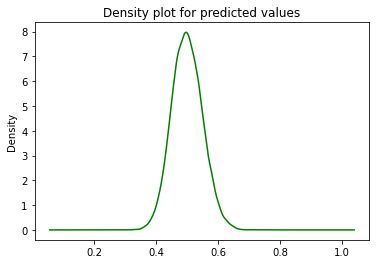

In [392]:
y_pred_n.plot.density(color='green')
plt.title('Density plot for predicted values')
plt.show()

In [393]:
y_pred = np.where(y_pred_n >0.5,1,0)

In [394]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy of logistic regression classifier on test set: 0.55


In [395]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [396]:
print(cm)

[[12998 11465]
 [  796  1832]]


In [397]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, zero_division=1)

0.2300784929356358